In [15]:
import numpy as np
import scipy as sp
import sklearn.metrics
from sklearn.metrics import confusion_matrix
import math
import pylab as pl

In [16]:
data_file = open("../Dataset/data_banknote_authentication.txt", 'r')
data_string = data_file.read()
data_strings = np.array(data_string.split('\n'))
x_data = []
y_data = []
data = []

In [17]:
print(data_strings)
data_strings[0].split(',')
for i in range(data_strings.shape[0]):
    a = data_strings[i].split(',')
    x_data.append(a[0:4])
    y_data.append(a[4])
    data.append(data_strings[i].split(','))
    
x_data = np.array(x_data)   
y_data = np.array(y_data)
data = np.array(data)
np.random.shuffle(data)
print(data)

['3.6216,8.6661,-2.8073,-0.44699,0' '4.5459,8.1674,-2.4586,-1.4621,0'
 '3.866,-2.6383,1.9242,0.10645,0' ... '-3.7503,-13.4586,17.5932,-2.7771,1'
 '-3.5637,-8.3827,12.393,-1.2823,1' '-2.5419,-0.65804,2.6842,1.1952,1']
[['1.8799' '2.4707' '2.4931' '0.37671' '0']
 ['-4.0025' '-13.4979' '17.6772' '-3.3202' '1']
 ['0.4339' '5.5395' '2.033' '-0.40432' '0']
 ...
 ['3.1896' '5.7526' '-0.18537' '-0.30087' '0']
 ['-5.525' '6.3258' '0.89768' '-6.6241' '1']
 ['4.4069' '10.9072' '-4.5775' '-4.4271' '0']]


In [18]:
def con(a):
    b = []
    for i in range(len(a)):
        b.append(float(a[i]))
    return b


In [19]:
def sigmoid(x):
    return 1/(1+math.exp(-x))

In [20]:
def f(x, θ): # Regression function
    a = np.dot(x, θ)
    return sigmoid(a) # linear regression using the dot product

In [21]:
train_data = data[0:824] #training data, contains 60 percent of the data
validation_data = data[824:1098] #validation data, contains 20 percent of the data
test_data = data[1098:1373] #testing data, contains the remaining 20 percent of the code


In [22]:
α = 1e-2 # dlearning rate
θ = np.ones(5) # initialize our parameters
θ_old = np.zeros(5) # initialize the old parameter values (it's different from the parameter values so we can enter the while loop below)
while np.sqrt(np.sum(np.power(θ - θ_old, 2))) > 0.001: # while euclidean norm > 0.001 (so ϵ = 0.001) 
    θ_old = θ # set old parameter values to parameter values before they are updated
    for i in range(train_data.shape[0]): # loop over each row of the design matrix (each data point)
        a = train_data[i]
        a = list(a[0:4])
        a.insert(0,1)
        a = np.array(a)
        a = con(a)
        θ = θ + α*(  (float(train_data[i][4])-(f(a, θ) )) * np.array(a)) # update the parameters using the update rule
        #print(θ)
                   

print("Model Parameters: ", θ) # Print model parameters after convergence

Model Parameters:  [ 9.04588544 -9.13549043 -4.79845416 -6.08942511 -0.47902319]


In [23]:

while np.sqrt(np.sum(np.power(θ - θ_old, 2))) > 0.001: # while euclidean norm > 0.1 (so ϵ = 0.001) 
    θ_old = θ # set old parameter values to parameter values before they are updated
    for i in range(validation_data.shape[0]): # loop over each row of the design matrix (each data point)
        a = validation_data[i]
        a = list(a[0:4])
        a.insert(0,1)
        a = np.array(a)
        a = con(a)
        θ = θ + α*(  (float(validation_data[i][4])-(f(a, θ) )) * np.array(a)) # update the parameters using the update rule
        #print(θ)
                   

print("Model Parameters: ", θ) # Print model parameters after convergence

Model Parameters:  [ 9.04588544 -9.13549043 -4.79845416 -6.08942511 -0.47902319]


In [24]:
def check(p):
    if p>=0.5:
        return 1
    else:
        return 0

In [25]:
right = 0
wrong = 0
y_test = []
y_pred = []
for i in range(test_data.shape[0]):
    #print(uiii[i][4])
    b = list(con(test_data[i][0:4]))
    y_test.append(test_data[i][4])
    b.insert(0,1)
    y_pred.append(check(f(b,θ)))
    if check(f(b,θ)) == int(test_data[i][4]):
        right = right + 1
    else:
        wrong = wrong + 1
        
        
print("Percentage of testing data we got right ",((right/274)*100))
print("Percentage of testing data we got wrong ",((wrong/274)*100))
#print(wrong)

Percentage of testing data we got right  97.08029197080292
Percentage of testing data we got wrong  2.9197080291970803


[[147   5]
 [  3 119]]


<function matplotlib.pyplot.show(*args, **kw)>

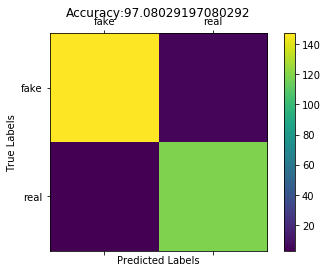

In [26]:
y_pred = con(np.array(y_pred))
y_test = con(np.array(y_test))
labels = ['fake','real']
cm = confusion_matrix(y_test, y_pred)
print(cm)
fig = pl.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
a = str(((right/274)*100))
pl.title('Accuracy:' + a)
fig.colorbar(cax)
ax.set_xticklabels(['']+labels)
ax.set_yticklabels(['']+labels)
pl.xlabel('Predicted Labels')
pl.ylabel('True Labels')
pl.show